## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

### MINIST

In [2]:
from sklearn import datasets

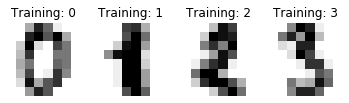

In [3]:
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
y = digits.target

#### Train test split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    data, y, test_size=0.20, random_state=42)

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
print(clf.feature_importances_)

[0.         0.         0.01756739 0.         0.         0.00987083
 0.00595851 0.         0.         0.00545624 0.02285913 0.
 0.00291461 0.01529978 0.00243603 0.         0.         0.00223178
 0.0054384  0.008584   0.01194849 0.07564476 0.0141354  0.
 0.         0.00721716 0.04652433 0.01534385 0.04975385 0.0127256
 0.07318006 0.         0.         0.06007633 0.03173613 0.0143922
 0.0978259  0.01225125 0.03104414 0.         0.         0.00827902
 0.06621906 0.03936143 0.01744124 0.         0.03941176 0.
 0.         0.         0.00271246 0.00290421 0.00881515 0.03282865
 0.03815697 0.         0.         0.         0.01270464 0.
 0.03910781 0.03680809 0.00283336 0.        ]


In [9]:
y_test_pred = clf.predict(x_test)

In [16]:
y_test_pred_proba = clf.predict_proba(x_test)

## Evaluation

In [10]:
from sklearn import metrics

In [11]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_test_pred)))

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       0.73      0.68      0.70        28
           2       0.78      0.94      0.85        33
           3       0.79      0.91      0.85        34
           4       0.95      0.85      0.90        46
           5       0.97      0.74      0.84        47
           6       0.83      0.97      0.89        35
           7       0.79      0.97      0.87 

In [12]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_test_pred))

Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 19  3  2  0  0  1  0  2  1]
 [ 0  1 31  1  0  0  0  0  0  0]
 [ 0  1  1 31  0  0  1  0  0  0]
 [ 0  0  0  0 39  0  3  4  0  0]
 [ 3  1  0  1  0 35  2  0  0  5]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  1  0  0 33  0  0]
 [ 0  3  5  1  0  1  0  1 18  1]
 [ 0  1  0  3  1  0  0  4  0 31]]


In [18]:
print(y_test_pred_proba[0])

[0.05505629 0.10265519 0.0972289  0.08556188 0.08046696 0.0843084
 0.30877277 0.03278073 0.0884789  0.06468998]
